# Рабочая тетрадь - распознавание рукописных цифр

In [ ]:
!pip install scikit-learn
!pip install mnist
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import os

In [ ]:
train, validation = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x = train[0].reshape(-1, 28, 28)
y = train[1]

x_validation = validation[0].reshape(-1, 28, 28)
y_validation = validation[1]

In [ ]:
y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
x.shape

(60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '5')

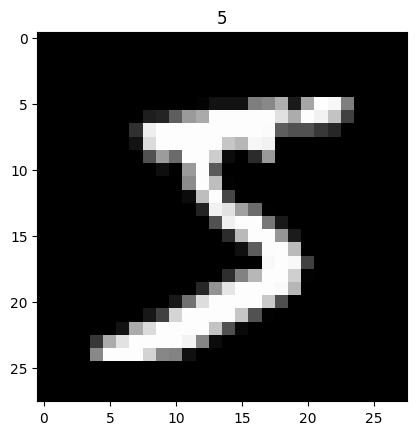

In [ ]:
plt.imshow(x[0], cmap="gray")
plt.title(y[0])

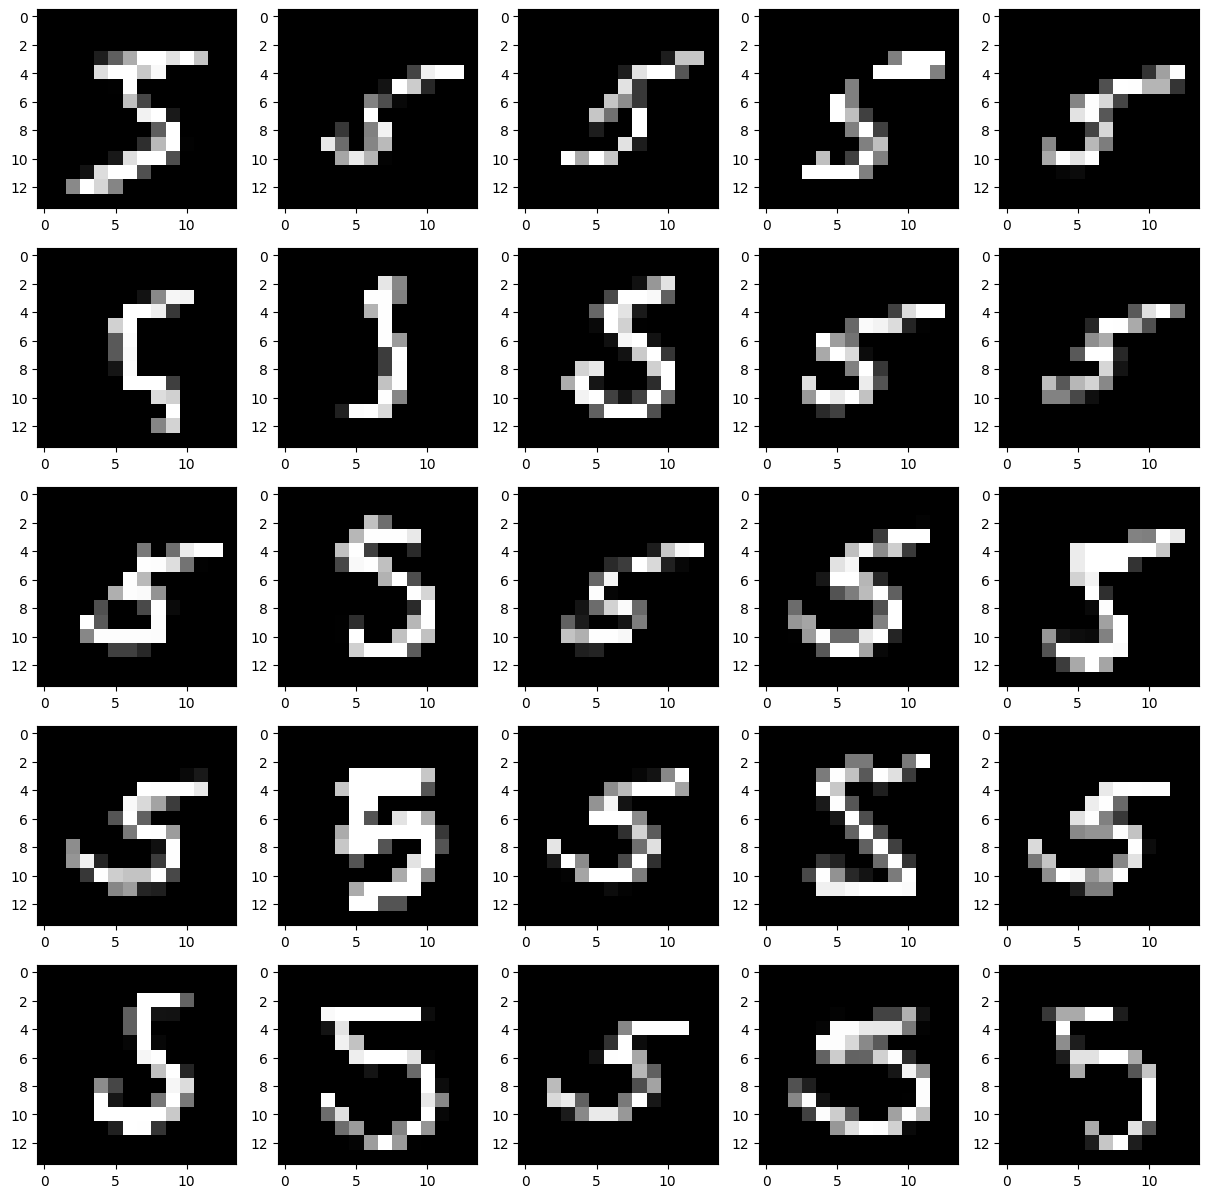

In [ ]:
fig, axs = plt.subplots(5,5, figsize=(15,15))
x_subset = x[y==5]
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(x_subset[5*i + j][::2, ::2], cmap="gray")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as kNN

In [ ]:
clf = kNN()

In [ ]:
clf.fit(x.reshape(-1, 784), y)

KNeighborsClassifier()

In [ ]:
%%time
y_pred = clf.predict(x_validation.reshape(-1, 784))

CPU times: user 56.2 s, sys: 3.4 s, total: 59.6 s
Wall time: 43 s


In [ ]:
x_validation.shape

(10000, 28, 28)

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_validation

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
import numpy as np
np.sum(y_pred != y_validation).item() / len(y_validation)

0.0312

## Ресайзим картинки

In [ ]:
clf2 = kNN()
clf2.fit(x[: ,::2,::2].reshape(-1, 14*14), y)

KNeighborsClassifier()

In [ ]:
%%time
y_pred2 = clf2.predict(x_validation[: ,::2,::2].reshape(-1, 14*14))

CPU times: user 18.6 s, sys: 2.87 s, total: 21.5 s
Wall time: 14.5 s


In [ ]:
np.sum(y_pred2 != y_validation).item() / len(y_validation)

0.0379

## Уменьшение размерности с помощью PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)

In [ ]:
pca.fit(x.reshape(-1, 784))

PCA(n_components=16)

In [ ]:
x_transformed = pca.transform(x.reshape(-1, 784))
x_validation_transformed = pca.transform(x_validation.reshape(-1, 784))

In [ ]:
x_transformed.shape, x_validation_transformed.shape

((60000, 16), (10000, 16))

In [ ]:
clf3 = kNN()
clf3.fit(x_transformed, y)

KNeighborsClassifier()

In [ ]:
%%time
y_pred3 = clf3.predict(x_validation_transformed)

CPU times: user 3.25 s, sys: 4.62 ms, total: 3.26 s
Wall time: 3.23 s


In [ ]:
np.sum(y_pred3 != y_validation).item() / len(y_validation)

0.037

## Случайный алгоритм

In [ ]:
y_pred4 = np.random.randint(low=0, high=10, size=len(y_validation))

In [ ]:
y_pred4

array([7, 2, 6, ..., 7, 2, 9])

In [ ]:
print("доля правильных ответов (accuracy):", np.sum(y_pred4 == y_validation).item() / len(y_validation))

доля правильных ответов (accuracy): 0.0999


# Визуализация с помощью t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)

In [ ]:
x_tsne = tsne.fit_transform(x[:2000].reshape(-1, 784))

In [ ]:
x_tsne.shape

(2000, 2)

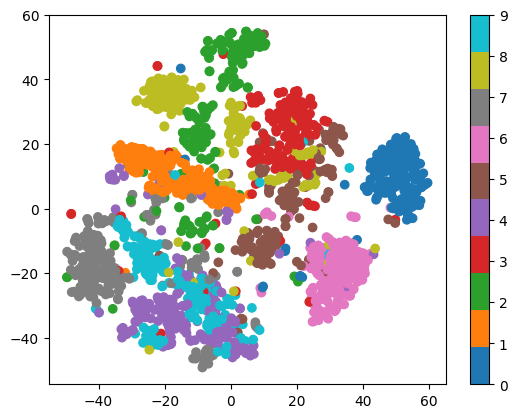

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y[:2000], cmap="tab10")
plt.colorbar()